# Visual Analysis Basics: Visualize Earnings Based on College Majors with Maplotlib and Seaborn

In that project I'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore and present data using visualizations.

I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github [repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).
The dataset was used [in that report](https://cew.georgetown.edu/wp-content/uploads/2014/11/whatsitworth-complete.pdf).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

 - `Rank` - Rank by median earnings (the dataset is ordered by this column).
 - `Major_code` - Major code.
 - `Major` - Major description.
 - `Major_category` - Category of major
 - `Total` - Total number of people with major.
 - `Sample_size` - Sample size (unweighted) of respondents
 - `Men` - Male graduates.
 - `Women` - Female graduates.
 - `ShareWomen` - Women as share of total.
 - `Employed` - Number employed.
 - `Median` - Median salary of full-time, year-round workers.
 - `Low_wage_jobs` - Number in low-wage service jobs.
 - `Full_time` - Number employed 35 hours or more.
 - `Part_time` - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- *Do students in more popular majors earn more money?*
- *How many majors are predominantly male? Predominantly female?*
- *Which category of majors have the most students?

First step is to import the libraries we need and clean the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

grads = pd.read_csv('recent-grads.csv')

In [2]:
grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [5]:
# delete a row with null value
grads = grads.dropna()
print(len(grads.index))

172


In [25]:
# sample size vs total ratio

grads_total = grads['Total'].sum()
grads_sample = grads['Sample_size'].sum()
print ('Graduated Total: {:,}.  Sample Size: {:,}. Ratio: {:.2%}'.format(
        grads_total, grads_sample,
        (grads_sample/grads_total)))

Graduated Total: 6,771,654.0.  Sample Size: 61,566. Ratio: 0.91% 


The sample of recent graduates is relatively small in comparison to the total number of graduates, fewer than 1%. We should take that into account.

Next step is to find which category of majors attracts more students. 

## Which majors are the most popular?

I'll estimate the total number of students for every major category.

In [7]:
# calculations for every category
grads_agg = grads.groupby('Major_category').agg({'Total':'sum', 
                         'Median':'median'})
# sort by total number
grads_agg = grads_agg.sort_values(by='Total', ascending=True)

grads_agg.head()

,Total,Median
Major_category,,
Interdisciplinary,12296.0,35000
Agriculture & Natural Resources,75620.0,35000
Law & Public Policy,179107.0,36000
Physical Sciences,185479.0,39500
Industrial Arts & Consumer Services,229792.0,35000


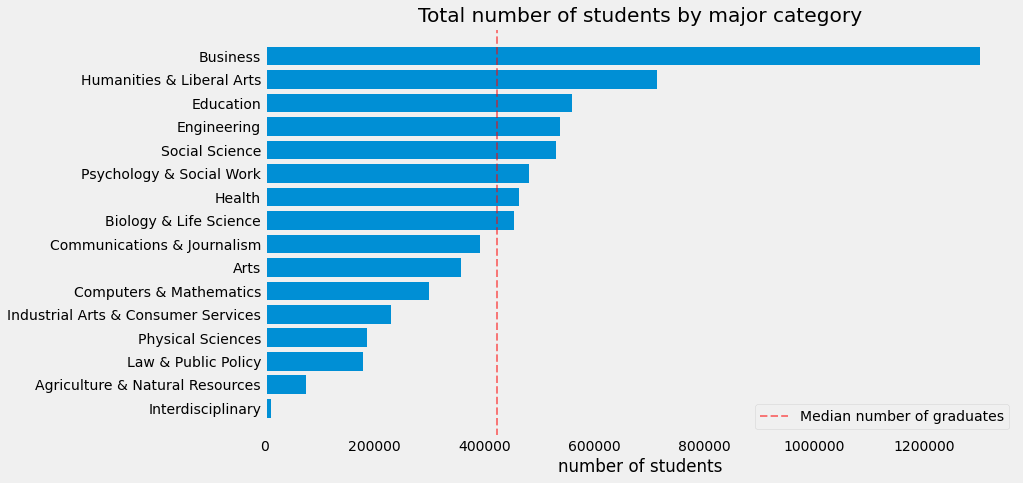

In [8]:
# plot bar chart
fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(grads_agg.index, grads_agg['Total'])
ax.set_title('Total number of students by major category')
ax.axvline(x=grads_agg['Total'].median(), label='Median number of graduates', color = 'red', alpha = 0.5, ls = '--', lw = 2)
ax.ticklabel_format(style='plain', axis = 'x')
ax.set_xlabel('number of students')
ax.grid(False)
ax.legend()

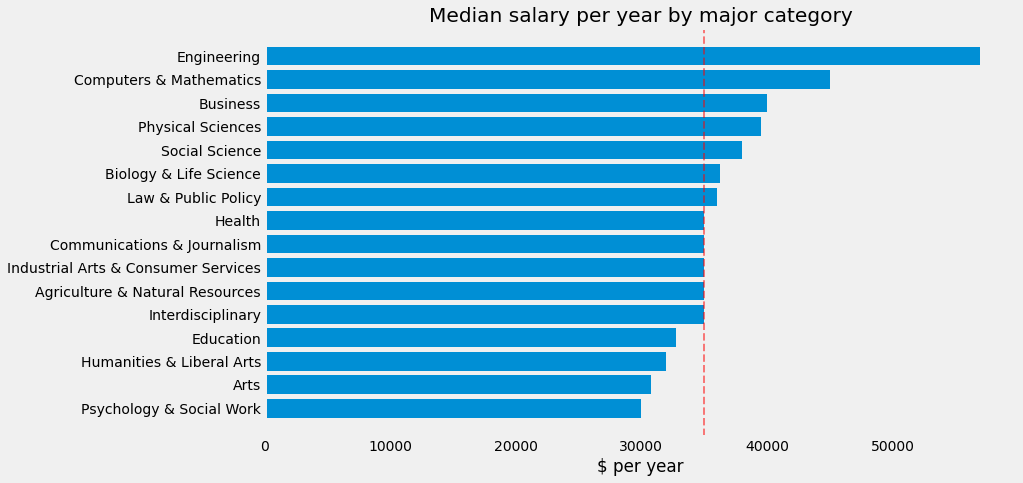

In [26]:
grads_agg = grads_agg.sort_values(by='Median', ascending=True)

# plot bar chart
fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(grads_agg.index, grads_agg['Median'])
ax.set_title('Median salary per year by major category')
ax.axvline(x=grads_agg['Median'].median(), label='Median salary', color = 'red', alpha = 0.5, ls = '--', lw = 2)
ax.ticklabel_format(style='plain', axis = 'x')
ax.set_xlabel('$ per year')
ax.grid(False)

Top-3 major categories with the most students are Business, Humanities &  Liberal Arts and Education. But most high paid are alumni of Engeneering, Computer&Matematics and Business categories.

### Sample size vs median salary

Text(0, 0.5, 'median salary, $')

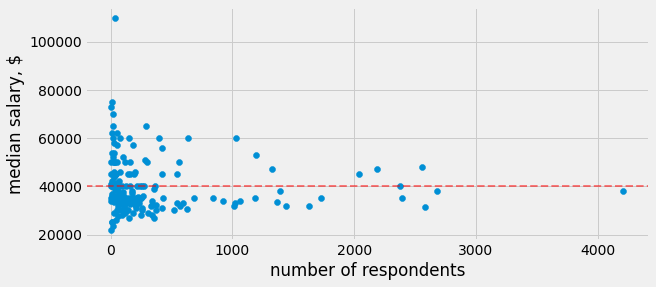

In [10]:
# plot median salary vs sample sizes
fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(x=grads['Sample_size'], y=grads['Median'])
ax.axhline(grads['Median'].mean(), color = 'red', alpha = 0.5, ls = '--', lw = 2)
ax.set_xlabel('number of respondents')
ax.set_ylabel('median salary, $')

### Sample size vs unemployment rate

Text(0, 0.5, 'unemployment rate, %')

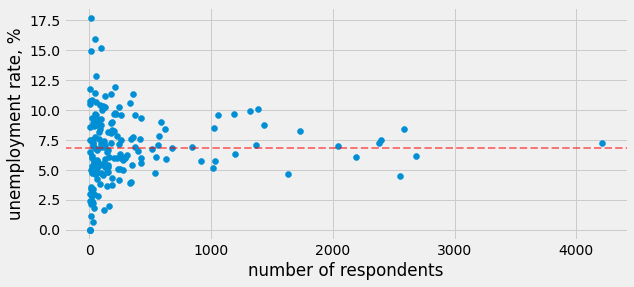

In [11]:
# plot umemployment rate vs sample size
fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(x=grads['Sample_size'], y= (grads['Unemployment_rate']*100))
ax.axhline((grads['Unemployment_rate'].mean()*100), color = 'red', alpha = 0.5, ls = '--', lw = 2)
ax.set_xlabel('number of respondents')
ax.set_ylabel('unemployment rate, %')

Two scatterplots show that people with most popular majors tend to earn close to median salary. The same situation happens with the unemployment rate.
The main problem here is a difference in sample sizes reflecting rather central limit theory in action but not necessarily the actual difference. 

## Median salary by major category

Previously I was taking into account only central tendency estimates (like mean, median or mode). In most cases we also need to have information on the variability or dispersion of the data. A **boxplot** is a graph indicating how the values in the data are spread out. Boxplots are pretty compact and enable an optimal comparison of distributions between many categories.
Box plots present the five-number summary of a data set: the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score. It can also show outliers in the data set.

I'll try to answer how data is spread in top-5 categories with the most high-paid employees.

Text(0.5, 0, '$ per year')

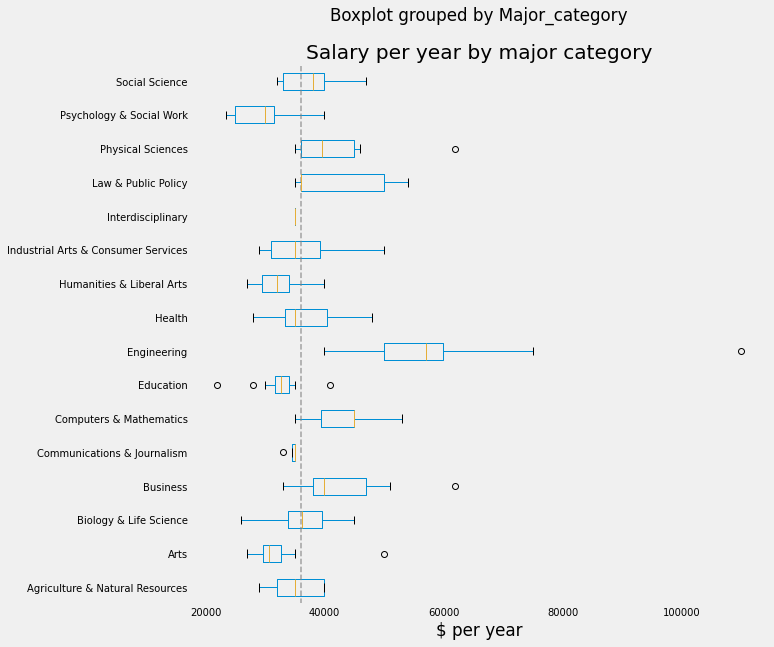

In [12]:
# create boxplot on median salaries
grads.boxplot(column = 'Median', by='Major_category', grid=False, vert= False, figsize= (10, 10), fontsize=10)
plt.title('Salary per year by major category')
plt.axvline(x=grads['Median'].median(), label='Median', color = 'grey', alpha = 0.7, ls = '--', lw = 1.5)
plt.xlabel('$ per year')

The top major categories in regard median salaries are:
- Engineering
- Computers & Mathematics
- Physical Science
- Business
- Social Science

The lowest median salaries are paid to employees in the following categories:
 - Psychology & Social Work
 - Humanities & Liberal Arts
 - Arts
 
Regarding dispersion of the data, salaries with the most variance can be found in Law & Public policy, Business and Engineering. The latest category is also characterized by a widest range of values, lower range starting above overall median salary and presence of one upper outlier. 

Salaries in the following categories are less variable:
 - Arts
 - Communications & Journalism
 - Education
Two latter categories although include lower outliers probably showing nearly-unpaid entry-level positions.

### Multimodal distributions with violin plots

The next step is to try to estimate if the wide range of salaries could be explained by the multimodal distribution (or presence of heterogeneous groups in the sample).

For that aim I will create violin plots. They are similar to box plots, except that they also show the probability density of the data at different values. 

It could be done instead of box plot because typically a violin plot includes the same data: a marker for the median of the data; a box or marker indicating the interquartile range.

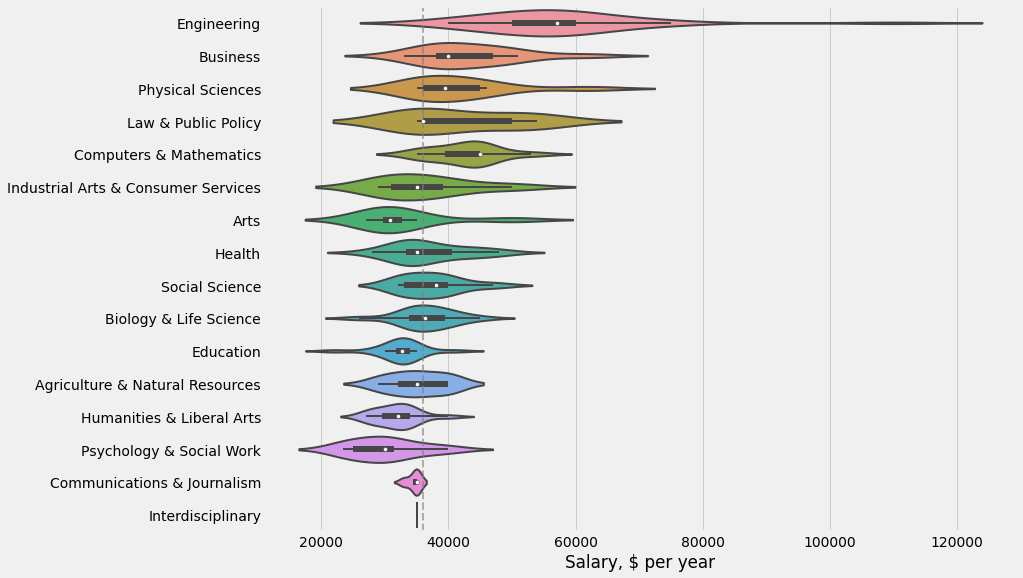

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,9))
sns.violinplot(x='Median', y='Major_category', data=grads, scale = 'width', orient ='h', linewidth = 2)
ax.set_ylabel("")
ax.set_xlabel('Salary, $ per year')
ax.axvline(x=grads['Median'].median(), label='Median', color = 'grey', alpha = 0.6, ls = '--', lw = 2)

The violin plot comparison shows that there is a bimodal distribution of median salaries among the Law & Public Policy alumni that could be explained with the heterogeneity of the sample.

## Unemployment by major category


Text(0.5, 0, 'unemployment ratio')

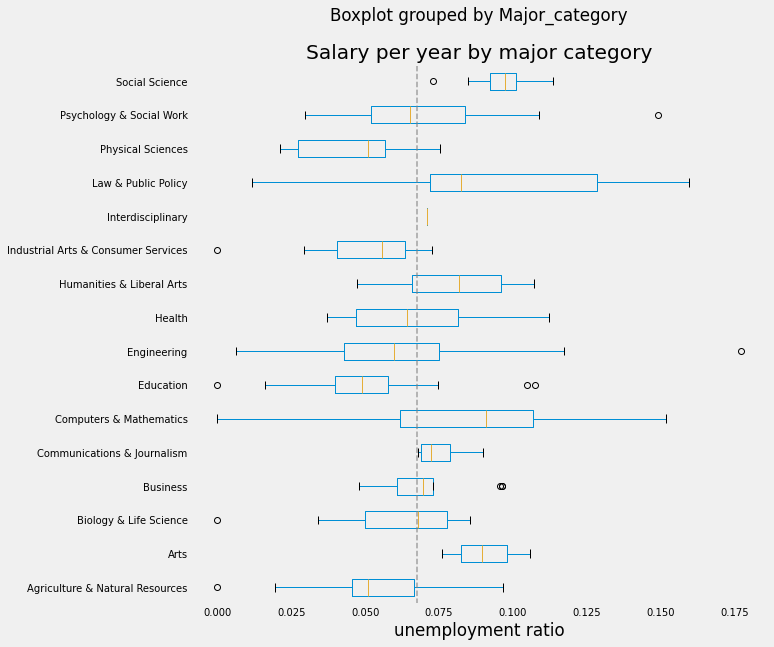

In [14]:
#create boxplot on unemployment
grads.boxplot(column = 'Unemployment_rate', by='Major_category', \
              grid=False, vert= False, figsize= (10, 10), fontsize=10)
plt.title('Salary per year by major category')
plt.axvline(x=grads['Unemployment_rate'].median(), label='Median', color = 'grey', alpha = 0.7, ls = '--', lw = 1.5)
plt.xlabel('unemployment ratio')

Surprisingly their highest values of unemployment can be found in categories with high salaries: Computers & Mathematics and Law & Public Policy as well as in categories with traditionally high unemployment rates like Humanities&Liberal Arts, Social Science and Arts.

It can be explained either with the highly competitive nature of domain (like public service) or widespread of free-lance or project-based jobs (for example in Computers & Mathematics). 

# Gender difference in majors and job outcomes
To have a first glance at the problem of gender difference I will create a scatter plot

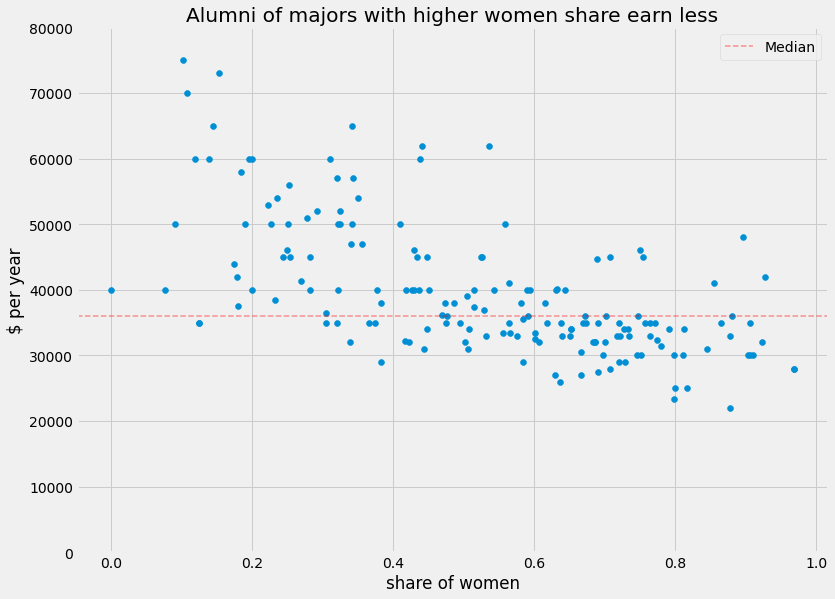

In [15]:
fig, ax = plt.subplots(figsize=(12,9))

# plot gender vs median salary
ax.scatter(grads['ShareWomen'], grads['Median'])
ax.set_ylabel('$ per year')
ax.set_xlabel('share of women')
ax.set_title('Alumni of majors with higher women share earn less')
ax.set_ylim(0, 80000)
ax.axhline(y=grads['Median'].median(), label='Median', color = 'red', alpha = 0.4, ls = '--', lw = 1.5)
ax.legend()

There is a clear tendency that alumni of the majors with the lower share of female students tend to get higher median salaries. We don't have information about gender diffences inside a sample of each major, so there are only following hypothesis that we could evaluate.
 Difference in salary could be connected to:
  - female preferences toward certain major categories
  - low demand for employees with these majors (high unemployment rates)
  - widespead of part-time employment in these major categories
  - high share of people getting low-wage jobs in these major categories

In [16]:
# create new dataset on gender diversity grouped by category
grads_group = grads.groupby(grads['Major_category']).agg({'Median': 'median', 'Men': 'sum', 'Women': 'sum', 'ShareWomen': 'median', \
                                                         'Unemployment_rate': 'median', 'Total': 'sum', 'Part_time': 'sum'})

grads_group.sort_values(by='Women', ascending=True, inplace=True)

grads_group.head()

,Median,Men,Women,ShareWomen,Unemployment_rate,Total,Part_time
Major_category,,,,,,,
Interdisciplinary,35000,2817.0,9479.0,0.770901,0.070861,12296.0,3173
Agriculture & Natural Resources,35000,40357.0,35263.0,0.339671,0.050862,75620.0,15470
Law & Public Policy,36000,91129.0,87978.0,0.476461,0.082452,179107.0,38213
Physical Sciences,39500,95390.0,90089.0,0.520427,0.051098,185479.0,43444
Computers & Mathematics,45000,208725.0,90283.0,0.269194,0.090823,299008.0,53270


In [17]:
grads_group['ShareMen'] = 1 - grads_group['ShareWomen']
sorted_grads = grads_group.sort_values(by='ShareWomen')

## Create a stacked bar plot

<AxesSubplot:title={'center':'Male vs female students in major categories'}, ylabel='Major_category'>

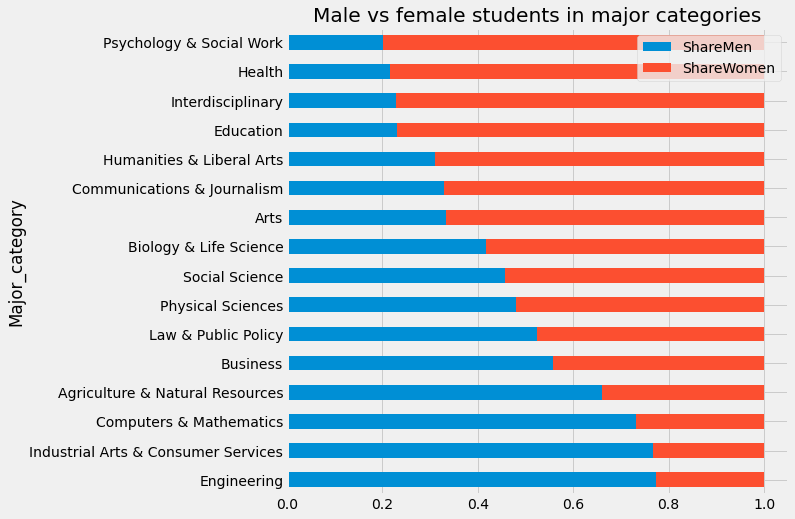

In [18]:
# create horisontal stacked bar plot
sorted_grads[['ShareMen', 'ShareWomen']].plot(kind='barh', stacked=True, figsize=(8, 8), \
                                   title='Male vs female students in major categories')

There are a number of major categories where the number of female and male graduates is or nearly equal, including the most numerous category of Business majors (also Social Science, Physical Sciences, Law & Public Policy).
There is a dramatic predominance of male graduates in two major categories with the highest median salaries (Engineering and Computer & Mathematics as well as in Industrial Arts & Consumer services.

Female graduates highly predominate in following categories: Psychology & Social work, Health, Interdisciplinary, Education. High share of female graduates is also characteristic for categories of Humanities & Liberal Arts, Communications & Journalism and Arts. Most of them have relatively low median salaries.
Next step is to check how it is connected to the share of part-time jobs and unemployment.

## Gender difference in salaries: unemployment and part-time jobs

In [19]:
# calculate part time share
grads['Part_time_share'] = grads['Part_time']/grads['Employed']

# calculate low wage share
grads['Low_wage_share'] = grads['Low_wage_jobs']/grads['Employed']

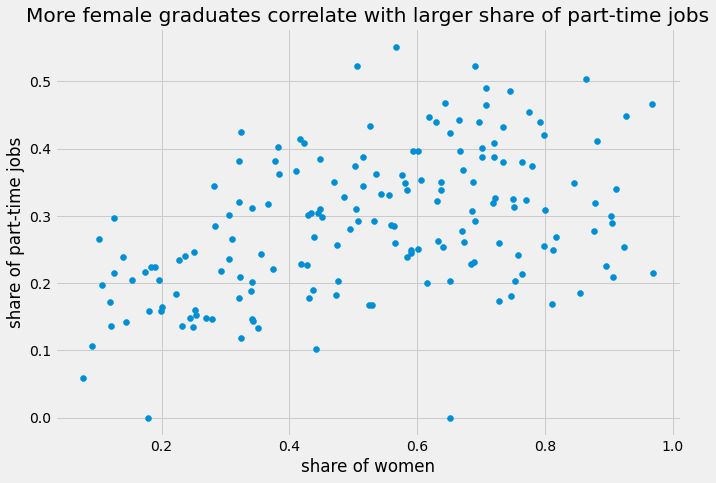

In [20]:
# create scatterplot
fig, ax = plt.subplots(figsize=(10,7))

# plot gender vs part time
ax.scatter(grads['ShareWomen'], grads['Part_time_share'])
ax.set_ylabel('share of part-time jobs')
ax.set_xlabel('share of women')
ax.set_title('More female graduates correlate with larger share of part-time jobs')
#add trendline
z = np.polyfit(grads['ShareWomen'], grads['Part_time_share'], 1)# why i can not see it?
p = np.poly1d(z)
ax.plot(grads['ShareWomen'], p(grads['ShareWomen']), 'r--', linewidth=0.6)

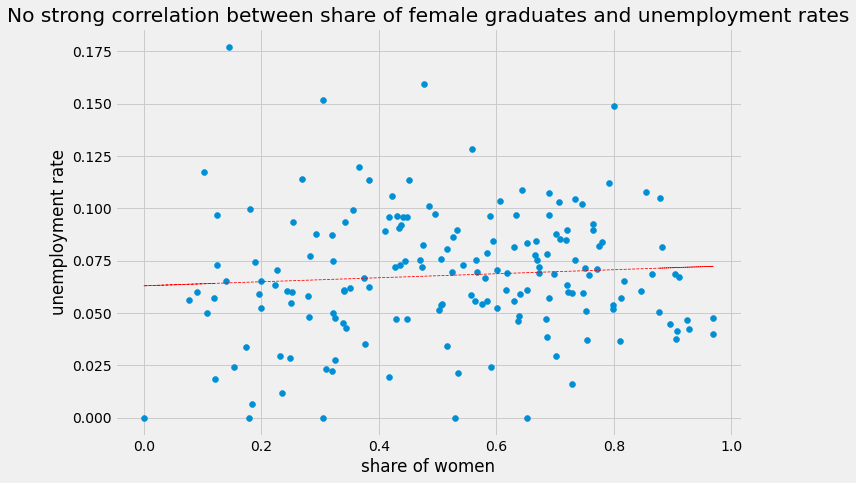

In [21]:
fig, ax = plt.subplots(figsize=(10,7))

# plot gender vs part time
ax.scatter(grads['ShareWomen'], grads['Unemployment_rate'])
ax.set_ylabel('unemployment rate')
ax.set_xlabel('share of women')
ax.set_title('No strong correlation between share of female graduates and unemployment rates')
#add trendline
z = np.polyfit(grads['ShareWomen'], grads['Unemployment_rate'], 1)
p = np.poly1d(z)
ax.plot(grads['ShareWomen'], p(grads['ShareWomen']), 'r--', linewidth=0.8)

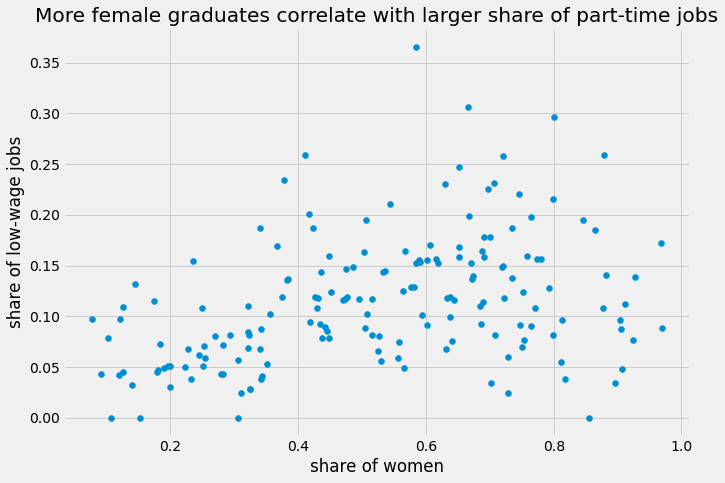

In [22]:
fig, ax = plt.subplots(figsize=(10,7))

# plot gender vs low-wage
ax.scatter(grads['ShareWomen'], grads['Low_wage_share'])
ax.set_ylabel('share of low-wage jobs')
ax.set_xlabel('share of women')
ax.set_title('More female graduates correlate with larger share of part-time jobs')
#add trendline
z = np.polyfit(grads['ShareWomen'], grads['Low_wage_share'], 1)
p = np.poly1d(z)
ax.plot(grads['ShareWomen'], p(grads['ShareWomen']), 'r--', linewidth=0.8)

### Final glance at gender differences in incomes in connection to low-wage and part-time jobs share
My last step is to try building a vizualisation that will present several parameters and graphically show how median salary is connected to gender proportions, share of part-time and low-wage jobs.

Text(0.5, 1.0, 'Large share of females lower salaries are correlcated to share of part-time and low-wage jobs')

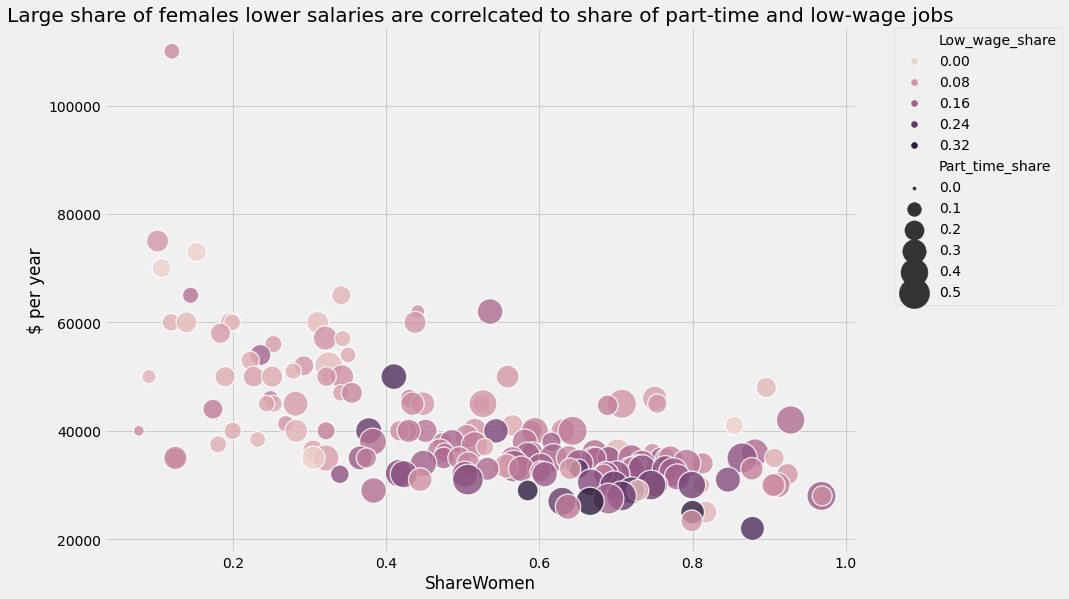

In [23]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(data=grads, x='ShareWomen', y='Median', hue='Low_wage_share',\
                size='Part_time_share',sizes=(10, 1000), hue_norm=(0, 0.3),\
                edgecolors='black', alpha=0.8)
plt.ylabel('$ per year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Large share of females lower salaries are correlcated to share of part-time and low-wage jobs')

# Conclusion
- Median salaries have a wide range with minimum of 22.000 and maximum of 110.000 dollars per year with a median salary 36.000 dollars per year

- Graduates of the most popular majors don't necessarily get a higher-than average salary. Among top-3 major categories by total number of graduates only graduates of Business majors tend to get a wide range of salaries with median above average. Two other categories, Humanities & Arts and Education, are characterized by lower salaries.

- There are differences in major preferences between women and men, with higher-than-average salaries in 'male' domains (major categories Engineering, Computer & Mathematics) and low salaries in 'female' domains (Psychology & Social work, Health, Interdisciplinary, Education).

- There are number of major categories where share of female students is nearly equal to males: Business, Social Science, Physical Sciences, Law & Public Policy.

- Low salaries in 'female' domains are not necessarily connected to low overall demand for these workers or low quality of education (because it's not highly correlated to high unemployment rates), but rather with higher number of people who work part-time and have a low-wage service job (that also could be connected to lower share of full-time employed). 